In [13]:
import pandas as pd  # For data manipulation
import numpy as np   # For numerical operations
import torch
from sklearn.model_selection import train_test_split  # For splitting data
from sklearn.preprocessing import StandardScaler, MinMaxScaler  # For scaling
from sklearn.impute import SimpleImputer  # For handling missing values
from sklearn.preprocessing import OneHotEncoder, LabelEncoder  # For encoding categorical data

In [25]:
pd.set_option('display.max_columns', None)
df = pd.read_csv("D:\\GEMASTIK\\Latihan\\Tugas Pak Rizal 1\\ALLFLOWMETER_HIKARI2021.csv\\ALLFLOWMETER_HIKARI2021.csv")
df.head()  

,Unnamed: 0.1,Unnamed: 0,uid,originh,originp,responh,responp,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,bwd_pkts_per_sec,flow_pkts_per_sec,down_up_ratio,fwd_header_size_tot,fwd_header_size_min,fwd_header_size_max,bwd_header_size_tot,bwd_header_size_min,bwd_header_size_max,flow_FIN_flag_count,flow_SYN_flag_count,flow_RST_flag_count,fwd_PSH_flag_count,bwd_PSH_flag_count,flow_ACK_flag_count,fwd_URG_flag_count,bwd_URG_flag_count,flow_CWR_flag_count,flow_ECE_flag_count,fwd_pkts_payload.min,fwd_pkts_payload.max,fwd_pkts_payload.tot,fwd_pkts_payload.avg,fwd_pkts_payload.std,bwd_pkts_payload.min,bwd_pkts_payload.max,bwd_pkts_payload.tot,bwd_pkts_payload.avg,bwd_pkts_payload.std,flow_pkts_payload.min,flow_pkts_payload.max,flow_pkts_payload.tot,flow_pkts_payload.avg,flow_pkts_payload.std,fwd_iat.min,fwd_iat.max,fwd_iat.tot,fwd_iat.avg,fwd_iat.std,bwd_iat.min,bwd_iat.max,bwd_iat.tot,bwd_iat.avg,bwd_iat.std,flow_iat.min,flow_iat.max,flow_iat.tot,flow_iat.avg,flow_iat.std,payload_bytes_per_second,fwd_subflow_pkts,bwd_subflow_pkts,fwd_subflow_bytes,bwd_subflow_bytes,fwd_bulk_bytes,bwd_bulk_bytes,fwd_bulk_packets,bwd_bulk_packets,fwd_bulk_rate,bwd_bulk_rate,active.min,active.max,active.tot,active.avg,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,traffic_category,Label
0,0,0,Cg61Jch3vdz9DBptj,103.255.15.23,13316,128.199.242.104,443,2.207588,15,14,6,6,6.794746,6.341763,13.136509,0.933333,464,20,40,492,32,44,2,2,2,6,5,26,0,0,0,0,0.0,742.0,1826.0,121.733333,220.736581,0.0,1448.0,5025.0,358.928571,552.239840,0.0,1448.0,6851.0,236.241379,424.859275,18.119812,1.963762e+06,2.207603e+06,1.576859e+05,5.205052e+05,7.867813,2.032929e+06,2.177950e+06,1.675346e+05,5.606267e+05,7.867813,1.963762e+06,2.207603e+06,78842.963491,3.696378e+05,3103.387105,7.5,7.0,913.0,2512.5,0.0,0.0,0.0,0.0,0.0,0.0,2.207603e+06,2.207603e+06,2.207603e+06,2.207603e+06,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,29200,65160,0,Bruteforce-XML,1
1,1,1,CdRIlqLWdj35Y9vW9,103.255.15.23,13318,128.199.242.104,443,15.624266,15,14,6,6,0.960045,0.896042,1.856087,0.933333,488,20,44,468,32,44,2,2,2,6,5,26,0,0,0,0,0.0,745.0,1829.0,121.933333,221.339257,0.0,1448.0,5025.0,358.928571,552.239840,0.0,1448.0,6854.0,236.344828,424.987166,20.980835,1.534300e+07,1.562428e+07,1.116020e+06,4.094889e+06,20.980835,1.541144e+07,1.559517e+07,1.199628e+06,4.270148e+06,10.013580,1.534300e+07,1.562428e+07,558009.896960,2.897622e+06,438.676603,7.5,7.0,914.5,2512.5,0.0,0.0,0.0,0.0,0.0,0.0,2.883792e+04,2.524381e+05,2.812760e+05,1.406380e+05,158109.181742,1.534300e+07,1.534300e+07,1.534300e+07,1.534300e+07,0.0,29200,65160,0,Bruteforce-XML,1
2,2,2,CLzp9Khd0Y09Qkgrg,103.255.15.23,13320,128.199.242.104,443,12.203357,14,13,6,5,1.147225,1.065281,2.212506,0.928571,432,20,40,448,32,44,2,2,2,6,5,24,0,0,0,0,0.0,744.0,1828.0,130.571429,226.803444,0.0,2896.0,5025.0,386.538462,817.479013,0.0,2896.0,6853.0,253.814815,592.570284,36.001205,1.196814e+07,1.220338e+07,9.387216e+05,3.314032e+06,15.020370,1.203674e+07,1.217482e+07,1.014569e+06,3.471107e+06,15.020370,1.196814e+07,1.220338e+07,469360.810060,2.345336e+06,561.566789,7.0,6.5,914.0,2512.5,0.0,0.0,0.0,0.0,0.0,0.0,2.891302e+04,2.063251e+05,2.352381e+05,1.176190e+05,125449.251656,1.196814e+07,1.196814e+07,1.196814e+07,1.196814e+07,0.0,29200,65160,0,Bruteforce-XML,1
3,3,3,Cnf1YA4iLB4CSNWB88,103.255.15.23,13322,128.199.242.104,443,9.992448,14,13,6,5,1.401058,1.300983,2.702041,0.928571,432,20,40,436,32,44,2,2,2,6,5,24,0,0,0,0,0.0,744.0,1828.0,130.571429,226.803444,0.0,2896.0,5025.0,386.538462,817.479013,0.0,2896.0,6853.0,253.814815,592.570284,50.067902,9.759205e+06,9.992470e+06,7.686515e+05,2.701448e+06,20.980835,9.828447e+06,9.963348e+06,8.302790e+05,2.833716e+06,20.980835,9.759205e+06,9.992470e+06,384325.770231,1.912152e+06,685.817940,7.0,6.5,914.0,2512.5,0.0,0.0,0.0,0.0,0.0,0.0,2.952909e+04,2.037361e+05,2.332652e+05,1.166326e+05,123182.

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555278 entries, 0 to 555277
Data columns (total 88 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0.1              555278 non-null  int64  
 1   Unnamed: 0                555278 non-null  int64  
 2   uid                       555278 non-null  object 
 3   originh                   555278 non-null  object 
 4   originp                   555278 non-null  int64  
 5   responh                   555278 non-null  object 
 6   responp                   555278 non-null  int64  
 7   flow_duration             555278 non-null  float64
 8   fwd_pkts_tot              555278 non-null  int64  
 9   bwd_pkts_tot              555278 non-null  int64  
 10  fwd_data_pkts_tot         555278 non-null  int64  
 11  bwd_data_pkts_tot         555278 non-null  int64  
 12  fwd_pkts_per_sec          555278 non-null  float64
 13  bwd_pkts_per_sec          555278 non-null  f

In [29]:
df.isnull().sum()


Unnamed: 0.1                0
Unnamed: 0                  0
uid                         0
originh                     0
originp                     0
responh                     0
responp                     0
flow_duration               0
fwd_pkts_tot                0
bwd_pkts_tot                0
fwd_data_pkts_tot           0
bwd_data_pkts_tot           0
fwd_pkts_per_sec            0
bwd_pkts_per_sec            0
flow_pkts_per_sec           0
down_up_ratio               0
fwd_header_size_tot         0
fwd_header_size_min         0
fwd_header_size_max         0
bwd_header_size_tot         0
bwd_header_size_min         0
bwd_header_size_max         0
flow_FIN_flag_count         0
flow_SYN_flag_count         0
flow_RST_flag_count         0
fwd_PSH_flag_count          0
bwd_PSH_flag_count          0
flow_ACK_flag_count         0
fwd_URG_flag_count          0
bwd_URG_flag_count          0
flow_CWR_flag_count         0
flow_ECE_flag_count         0
fwd_pkts_payload.min        0
fwd_pkts_p

In [43]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
num_categorical_columns = len(categorical_columns)
print(num_categorical_columns, categorical_columns)

3 Index(['originh', 'responh', 'traffic_category'], dtype='object')


In [41]:
df.drop(['uid'], inplace=True, axis=1)

In [59]:
pd.set_option('display.max_rows', None)
print(df['originh'].unique())
print(df['responh'].unique())
print(df['traffic_category'].unique())


['103.255.15.23' '103.255.15.27' '103.255.15.20' ... '128.199.193.172'
 '192.241.215.105' '205.185.126.174']
['128.199.242.104' '128.199.88.81' '103.255.15.23' ... '103.120.247.252'
 '104.18.5.86' '104.18.4.86']
['Bruteforce-XML' 'Bruteforce' 'Background' 'Benign' 'Probing'
 'XMRIGCC CryptoMiner']


In [63]:
duplicates = df['originh'].duplicated(keep=False)  # Tandai semua duplikat

# Hitung jumlah IP unik yang memiliki duplikat
duplicate_ips = df.loc[duplicates, 'originh'].unique()
num_duplicate_ips = len(duplicate_ips)
print(num_duplicate_ips)

988


In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

In [146]:
df.head()

,originh,originp,responh,responp,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,bwd_pkts_per_sec,flow_pkts_per_sec,down_up_ratio,fwd_header_size_tot,fwd_header_size_min,fwd_header_size_max,bwd_header_size_tot,bwd_header_size_min,bwd_header_size_max,flow_FIN_flag_count,flow_SYN_flag_count,flow_RST_flag_count,fwd_PSH_flag_count,bwd_PSH_flag_count,flow_ACK_flag_count,fwd_URG_flag_count,bwd_URG_flag_count,flow_CWR_flag_count,flow_ECE_flag_count,fwd_pkts_payload.min,fwd_pkts_payload.max,fwd_pkts_payload.tot,fwd_pkts_payload.avg,fwd_pkts_payload.std,bwd_pkts_payload.min,bwd_pkts_payload.max,bwd_pkts_payload.tot,bwd_pkts_payload.avg,bwd_pkts_payload.std,flow_pkts_payload.min,flow_pkts_payload.max,flow_pkts_payload.tot,flow_pkts_payload.avg,flow_pkts_payload.std,fwd_iat.min,fwd_iat.max,fwd_iat.tot,fwd_iat.avg,fwd_iat.std,bwd_iat.min,bwd_iat.max,bwd_iat.tot,bwd_iat.avg,bwd_iat.std,flow_iat.min,flow_iat.max,flow_iat.tot,flow_iat.avg,flow_iat.std,payload_bytes_per_second,fwd_subflow_pkts,bwd_subflow_pkts,fwd_subflow_bytes,bwd_subflow_bytes,fwd_bulk_bytes,bwd_bulk_bytes,fwd_bulk_packets,bwd_bulk_packets,fwd_bulk_rate,bwd_bulk_rate,active.min,active.max,active.tot,active.avg,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,traffic_category,Label,traffic_category_encoded
0,103.255.15.23,13316,128.199.242.104,443,2.207588,15,14,6,6,6.794746,6.341763,13.136509,0.933333,464,20,40,492,32,44,2,2,2,6,5,26,0,0,0,0,0.0,742.0,1826.0,121.733333,220.736581,0.0,1448.0,5025.0,358.928571,552.239840,0.0,1448.0,6851.0,236.241379,424.859275,18.119812,1.963762e+06,2.207603e+06,1.576859e+05,5.205052e+05,7.867813,2.032929e+06,2.177950e+06,1.675346e+05,5.606267e+05,7.867813,1.963762e+06,2.207603e+06,78842.963491,3.696378e+05,3103.387105,7.5,7.0,913.0,2512.5,0.0,0.0,0.0,0.0,0.0,0.0,2.207603e+06,2.207603e+06,2.207603e+06,2.207603e+06,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,29200,65160,0,Bruteforce-XML,1,3
1,103.255.15.23,13318,128.199.242.104,443,15.624266,15,14,6,6,0.960045,0.896042,1.856087,0.933333,488,20,44,468,32,44,2,2,2,6,5,26,0,0,0,0,0.0,745.0,1829.0,121.933333,221.339257,0.0,1448.0,5025.0,358.928571,552.239840,0.0,1448.0,6854.0,236.344828,424.987166,20.980835,1.534300e+07,1.562428e+07,1.116020e+06,4.094889e+06,20.980835,1.541144e+07,1.559517e+07,1.199628e+06,4.270148e+06,10.013580,1.534300e+07,1.562428e+07,558009.896960,2.897622e+06,438.676603,7.5,7.0,914.5,2512.5,0.0,0.0,0.0,0.0,0.0,0.0,2.883792e+04,2.524381e+05,2.812760e+05,1.406380e+05,158109.181742,1.534300e+07,1.534300e+07,1.534300e+07,1.534300e+07,0.0,29200,65160,0,Bruteforce-XML,1,3
2,103.255.15.23,13320,128.199.242.104,443,12.203357,14,13,6,5,1.147225,1.065281,2.212506,0.928571,432,20,40,448,32,44,2,2,2,6,5,24,0,0,0,0,0.0,744.0,1828.0,130.571429,226.803444,0.0,2896.0,5025.0,386.538462,817.479013,0.0,2896.0,6853.0,253.814815,592.570284,36.001205,1.196814e+07,1.220338e+07,9.387216e+05,3.314032e+06,15.020370,1.203674e+07,1.217482e+07,1.014569e+06,3.471107e+06,15.020370,1.196814e+07,1.220338e+07,469360.810060,2.345336e+06,561.566789,7.0,6.5,914.0,2512.5,0.0,0.0,0.0,0.0,0.0,0.0,2.891302e+04,2.063251e+05,2.352381e+05,1.176190e+05,125449.251656,1.196814e+07,1.196814e+07,1.196814e+07,1.196814e+07,0.0,29200,65160,0,Bruteforce-XML,1,3
3,103.255.15.23,13322,128.199.242.104,443,9.992448,14,13,6,5,1.401058,1.300983,2.702041,0.928571,432,20,40,436,32,44,2,2,2,6,5,24,0,0,0,0,0.0,744.0,1828.0,130.571429,226.803444,0.0,2896.0,5025.0,386.538462,817.479013,0.0,2896.0,6853.0,253.814815,592.570284,50.067902,9.759205e+06,9.992470e+06,7.686515e+05,2.701448e+06,20.980835,9.828447e+06,9.963348e+06,8.302790e+05,2.833716e+06,20.980835,9.759205e+06,9.992470e+06,384325.770231,1.912152e+06,685.817940,7.0,6.5,914.0,2512.5,0.0,0.0,0.0,0.0,0.0,0.0,2.952909e+04,2.037361e+05,2.332652e+05,1.166326e+05,123182.931318,9.759205e+06,9.759205e+06,9.759205e+06,9.759205e+06,0.0,29200,65160,0,Bruteforc

In [186]:
label_encoder = LabelEncoder()

# Melakukan label encoding pada kolom 'traffic_category'
df['traffic_category_encoded'] = label_encoder.fit_transform(df['traffic_category'])

df['traffic_category_encoded'] = df['traffic_category_encoded'].astype(int)

# Melihat hasil encoding
print(df[['traffic_category', 'traffic_category_encoded']].value_counts())

traffic_category     traffic_category_encoded
Benign               1                           347431
Background           0                           170151
Probing              4                            23388
Bruteforce           2                             5884
Bruteforce-XML       3                             5145
XMRIGCC CryptoMiner  5                             3279
Name: count, dtype: int64


In [188]:
data_pake = df.iloc[:, list(range(0, 8)) + list(range(12, 18)) + [83] + [85]]

data_pake.head()

,originh,originp,responh,responp,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,down_up_ratio,fwd_header_size_tot,fwd_header_size_min,fwd_header_size_max,bwd_header_size_tot,bwd_header_size_min,traffic_category,traffic_category_encoded
0,103.255.15.23,13316,128.199.242.104,443,2.207588,15,14,6,0.933333,464,20,40,492,32,Bruteforce-XML,3
1,103.255.15.23,13318,128.199.242.104,443,15.624266,15,14,6,0.933333,488,20,44,468,32,Bruteforce-XML,3
2,103.255.15.23,13320,128.199.242.104,443,12.203357,14,13,6,0.928571,432,20,40,448,32,Bruteforce-XML,3
3,103.255.15.23,13322,128.199.242.104,443,9.992448,14,13,6,0.928571,432,20,40,436,32,Bruteforce-XML,3
4,103.255.15.23,13324,128.199.242.104,443,7.780611,14,14,6,1.000000,432,20,40,480,32,Bruteforce-XML,3


In [148]:
print( df.columns.get_loc('traffic_category_encoded'))

85


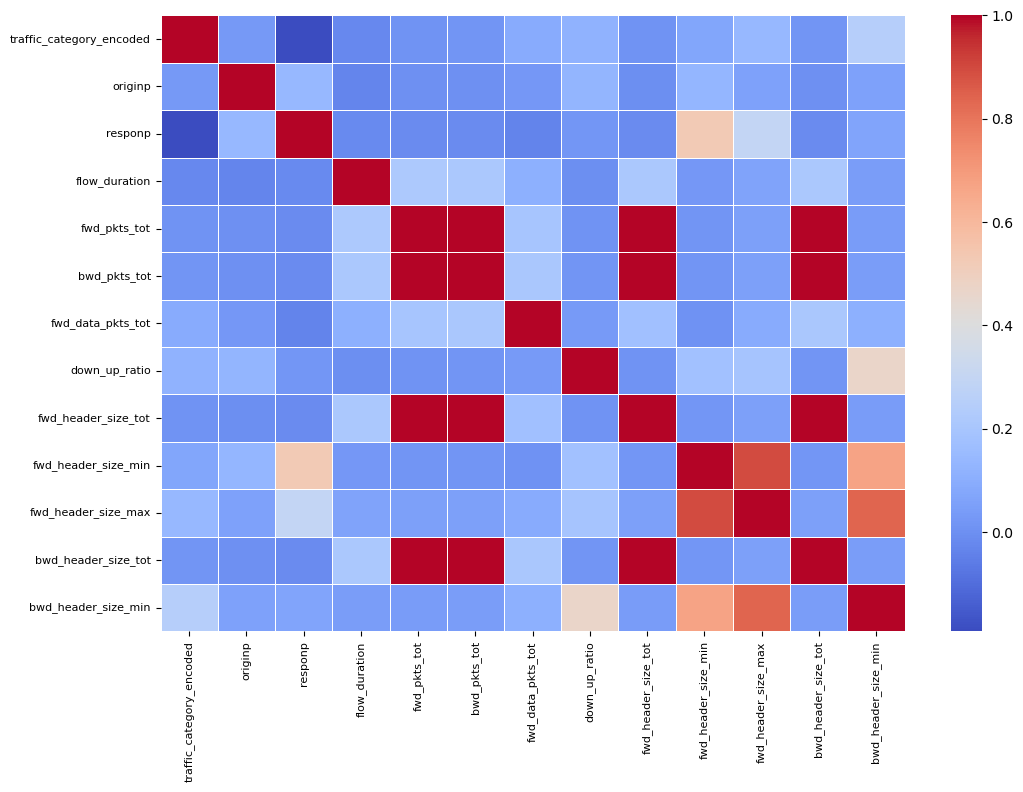

In [170]:
numerical_data = df[['traffic_category_encoded']].join(data_pake.select_dtypes(include=['float64', 'int64']))

corr_matrix = numerical_data.corr()

plt.figure(figsize=(12, 8)) 
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", linewidths=0.5)

plt.xticks(fontsize=8) 
plt.yticks(fontsize=8) 

plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12856\4224076628.py:16: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\ASUS\anaconda3\envs\jupyterEnv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


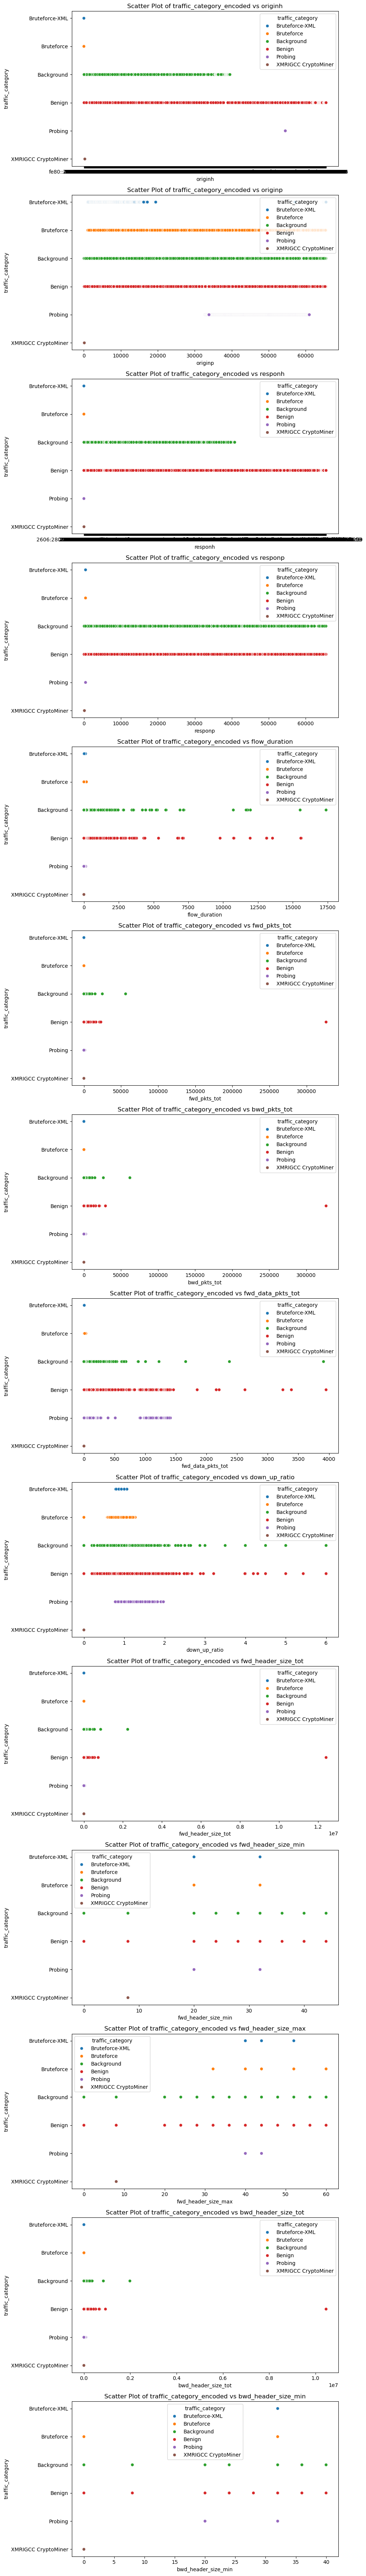

In [191]:
columns_to_compare = [col for col in data_pake.columns if col not in ['traffic_category_encoded', 'traffic_category']]

# Buat subplots untuk setiap kolom
fig, axes = plt.subplots(nrows=len(columns_to_compare), ncols=1, figsize=(10, 5 * len(columns_to_compare)))

# Jika hanya ada satu subplot, ax adalah array, jadi kita perlu menangani itu secara khusus
if len(columns_to_compare) == 1:
    axes = [axes]

for ax, col in zip(axes, columns_to_compare):
    sns.scatterplot(x=data_pake[col], y=data_pake['traffic_category'], hue=data_pake['traffic_category'], ax=ax)
    ax.set_title(f'Scatter Plot of traffic_category_encoded vs {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('traffic_category')

plt.tight_layout()
plt.show()